In [8]:
# Importing libraries

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

# Ignoring benign warnings

import warnings
warnings.filterwarnings("ignore")

In [9]:
# Importing and parsing dataset
# Arranging locations alphabetically

df = pd.read_csv('../input/revenues/revenues.csv', index_col='Location/Branch')
df.sort_index(inplace=True)

In [10]:
df.head()

,Dec 2022,Jan 2023,Feb 2023,March 2023
Location/Branch,,,,
Ahmedabad,₹4.55,₹7.18,₹4.84,₹2.89
Bangalore,₹14.93,₹15.14,₹9.82,₹10.85
Bihar,₹9.35,₹6.78,₹9.24,₹7.36
Chandigarh,₹6.71,₹8.10,₹7.23,₹6.15
Chattisgarh,₹7.87,₹5.63,₹6.86,₹5.23


In [11]:
# Converting currency values to float for numerical analysis

for col in df.columns:
    
    df[col] = df[col].apply(lambda x: x.replace('₹', ''))
    
df = df.astype('float')
df.head()

,Dec 2022,Jan 2023,Feb 2023,March 2023
Location/Branch,,,,
Ahmedabad,4.55,7.18,4.84,2.89
Bangalore,14.93,15.14,9.82,10.85
Bihar,9.35,6.78,9.24,7.36
Chandigarh,6.71,8.10,7.23,6.15
Chattisgarh,7.87,5.63,6.86,5.23


In [12]:
# Calculating total revenues for each month and location

df_tot = df.copy()

# Appending rows/columns for column/row subtotals

df_tot.loc['Total'] = df_tot.sum()
df_tot['Total'] = df_tot.sum(axis=1)
df_tot

,Dec 2022,Jan 2023,Feb 2023,March 2023,Total
Location/Branch,,,,,
Ahmedabad,4.55,7.18,4.84,2.89,19.46
Bangalore,14.93,15.14,9.82,10.85,50.74
Bihar,9.35,6.78,9.24,7.36,32.73
Chandigarh,6.71,8.10,7.23,6.15,28.19
Chattisgarh,7.87,5.63,6.86,5.23,25.59
Chennai,64.33,73.78,64.11,57.64,259.86
Delhi NCR,8.74,8.69,9.45,8.51,35.39
Hyderabad,29.42,24.31,23.74,19.55,97.02
Indore,19.03,25.50,21.16,13.21,78.90


1. The top 5 revenue-generating locations are Chennai, Kolkata, Hyderabad, Indore, and Lucknow.
2. The bottom 5 revenue-generating locations are Kochi, Jaipur, Mumbai, Ahmedabad.
3. January and December show slightly more revenues than February and March.
4. A dip in revenue is prominent in March.

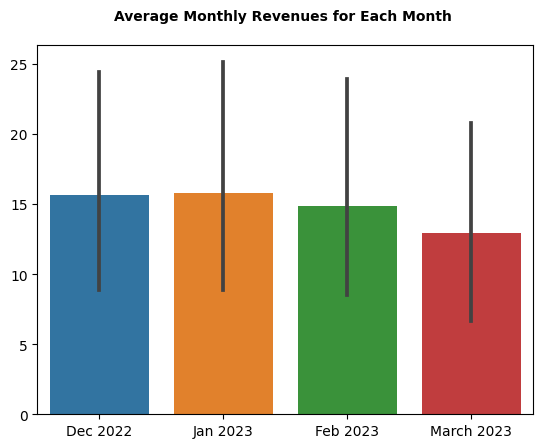

In [13]:
# Checking average monthly revenues and broad variations

sns.barplot(df)
plt.title('Average Monthly Revenues for Each Month \n', fontweight='bold', fontsize=10)
plt.show()

The above bar plot makes our previous inferences visible. It will help to look month-wise variations closely.

Text(0.5, 1.0, 'Variation in Monthly Revenue \n')

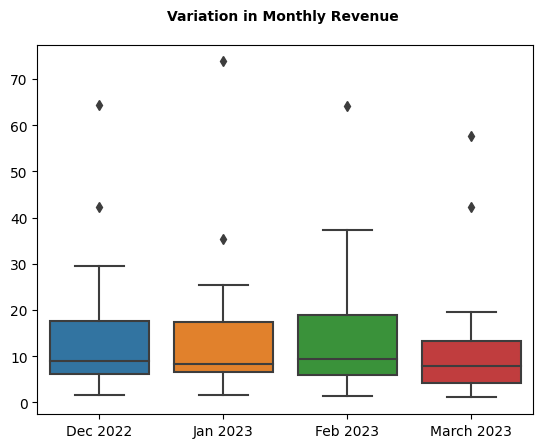

In [14]:
# Checking variations in monthly revenue closely

sns.boxplot(df)
plt.title('Variation in Monthly Revenue \n', fontweight='bold', fontsize=10)

1. The median revenues across locations are comparable for the first three months. They show a slight dip in March, as observed earlier.
2. February shows maximum revenue variations and March shows the minimum. 

Next, we compare average monthly revenues across all locations.

Text(0.5, 1.0, 'Average Monthly Revenues for Each Location \n')

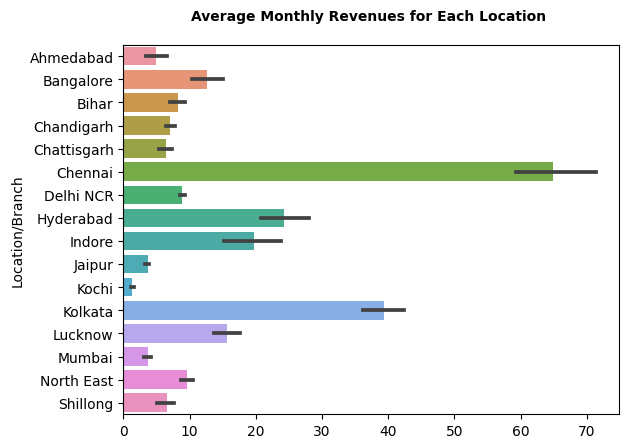

In [15]:
# Checking average and broad variations in monthly revenue for each location

sns.barplot(df.T, orient='h')
plt.title('Average Monthly Revenues for Each Location \n', fontweight='bold', fontsize=10)

The above plot again makes our previous inferences visible (about maximum/minimum revenue generating locations). But, next, we take a closer look at the variations.

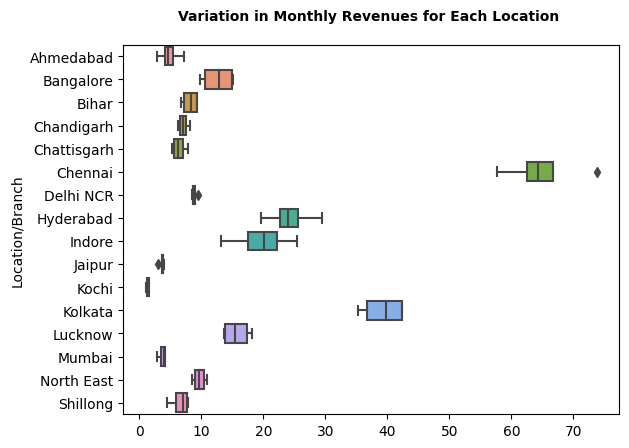

In [16]:
# Checking variations in monthly revenue for each location closely

sns.boxplot(df.T, orient='h')
plt.title('Variation in Monthly Revenues for Each Location \n', fontweight='bold', fontsize=10)
plt.show()

1. Locations generating low revenues also seem to have lower variations. This can be explored further.
2. The January revenues for Chennai appear as an outlier.
3. Delhi and Jaipur show a high and low outlier respectively. But these could be benign outliers.

Next, for each month, we check revenue contributions from each location.

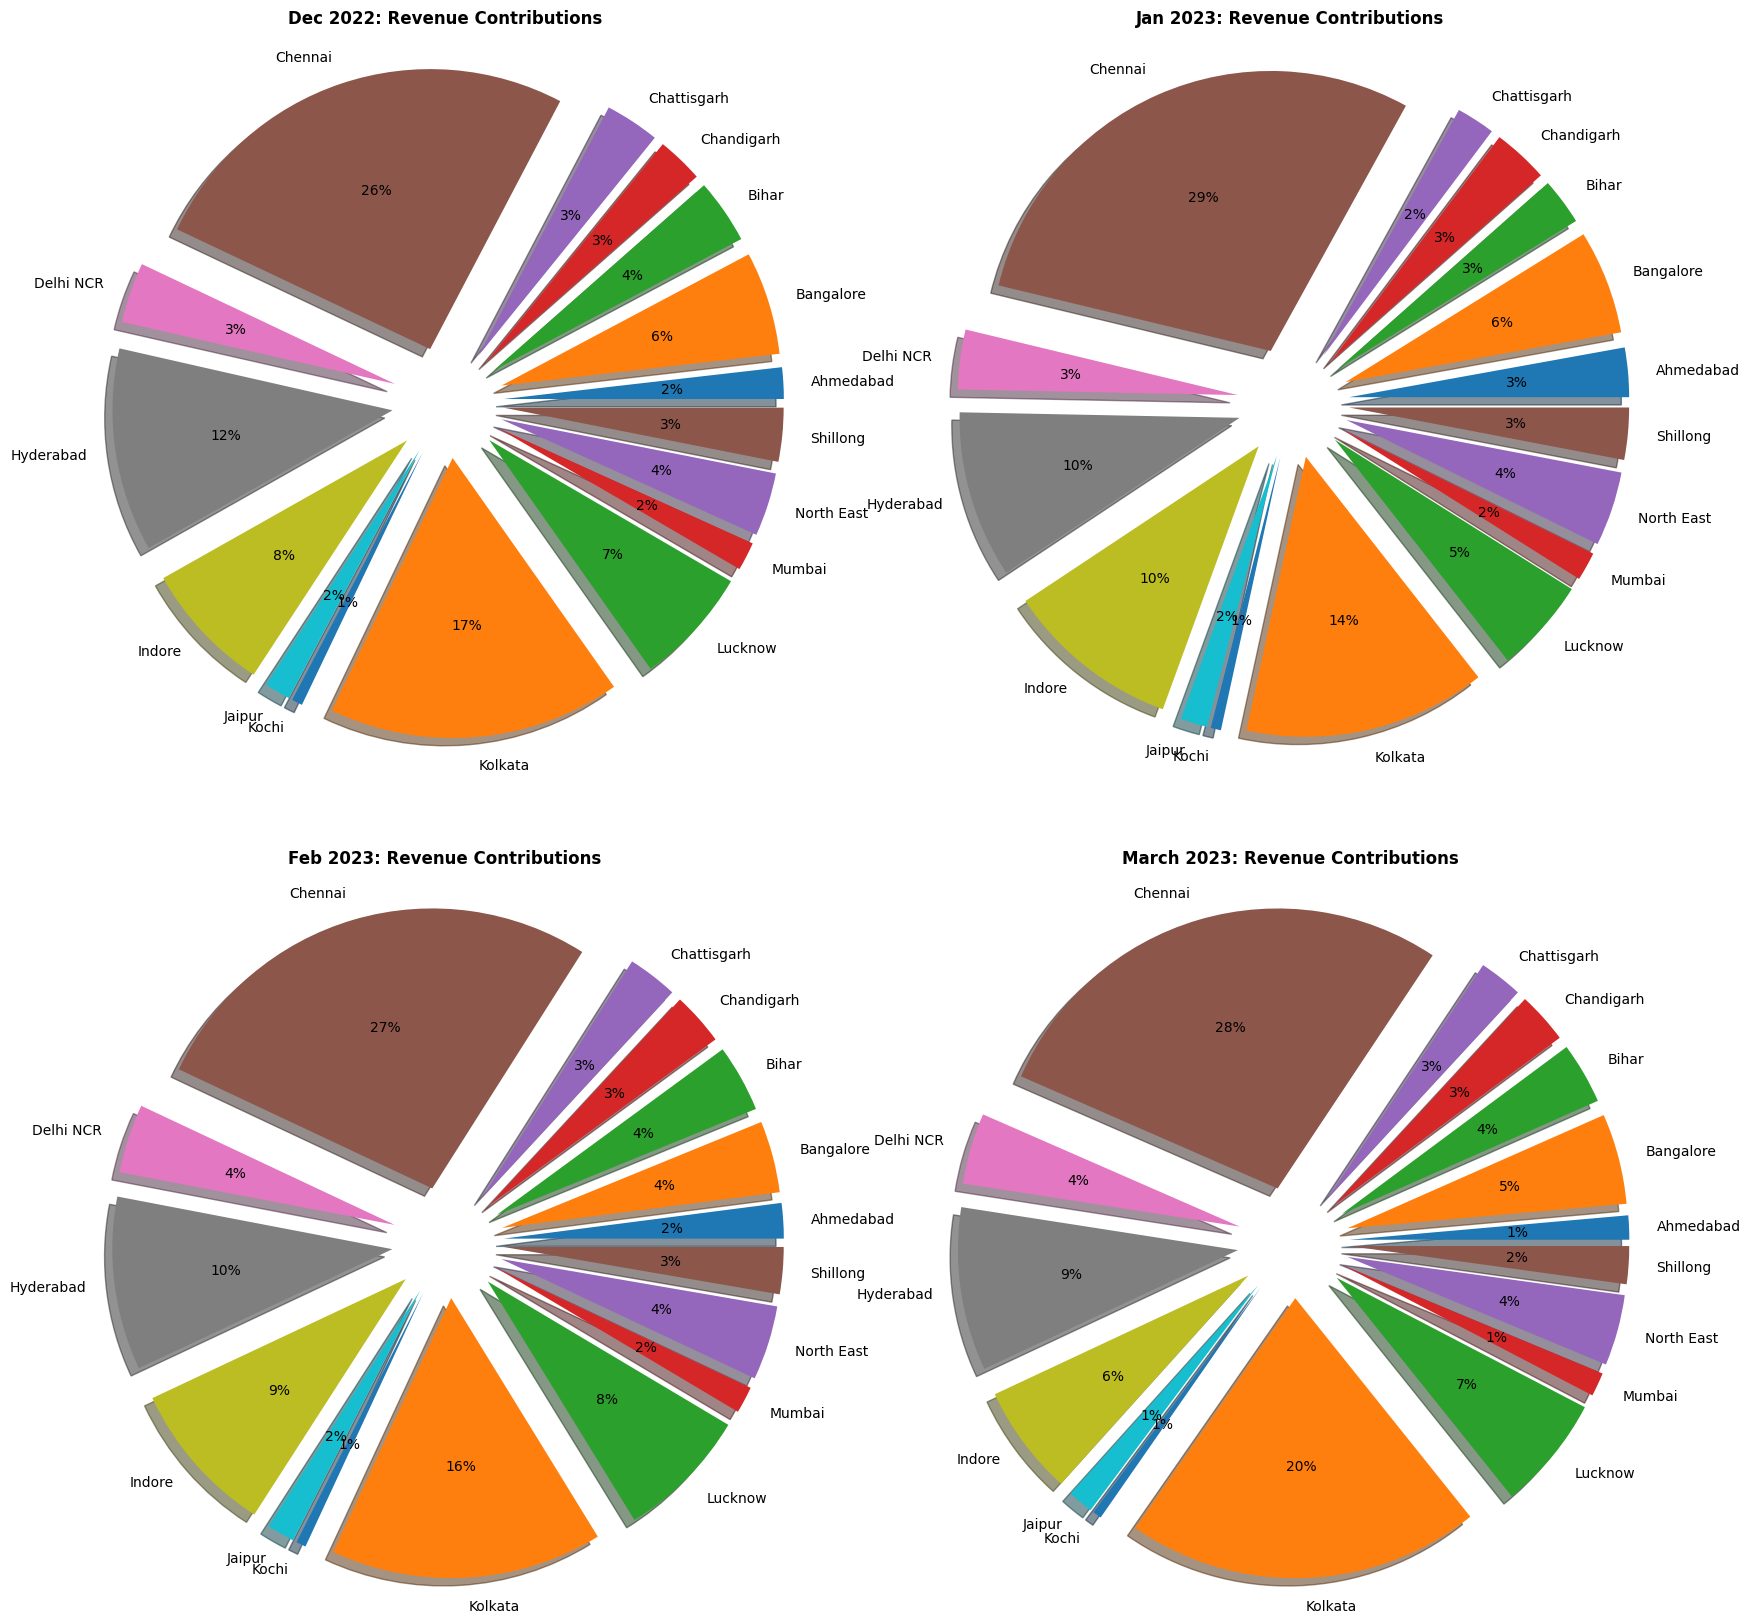

In [17]:
# Checking location-wise contributions to monthly revenue for each month

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

a = [0]*2 + [1]*2 
b = [0, 1]*2

for i, idx in enumerate(list(zip(a, b))):
    
    col = df.iloc[:, i]
    
    ax[idx[0], idx[1]].pie(col, labels=df.index, explode=0.2*np.ones(16), autopct='%1.0f%%', shadow=True, 
                           textprops={'fontsize': 10})
    ax[idx[0], idx[1]].set_title(df.columns[i] + ': Revenue Contributions \n', fontweight='bold', fontsize=12)
    

Broadly, the % revenue contributions of each location across months are comparable.

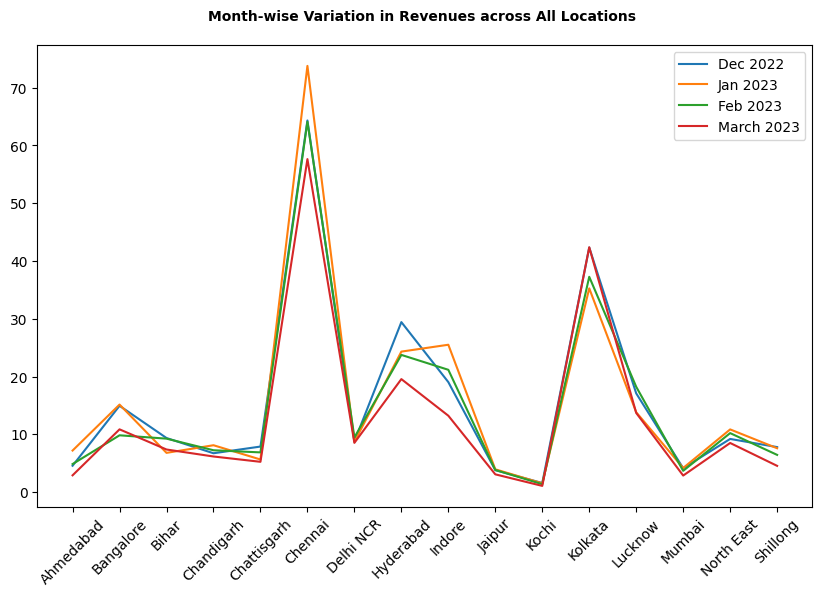

In [18]:
# Tracking variations in monthly revenue across locations and months

plt.figure(figsize=(10,6))
plt.plot(df)
plt.xticks(rotation=45)
plt.legend(df.columns)
plt.title('Month-wise Variation in Revenues across All Locations \n', fontweight='bold', fontsize=10)
plt.show()

Again, for most locations, we confirm that revenues do not show significant variations across months. We find some significant relative variations in Hyderabad and Indore.

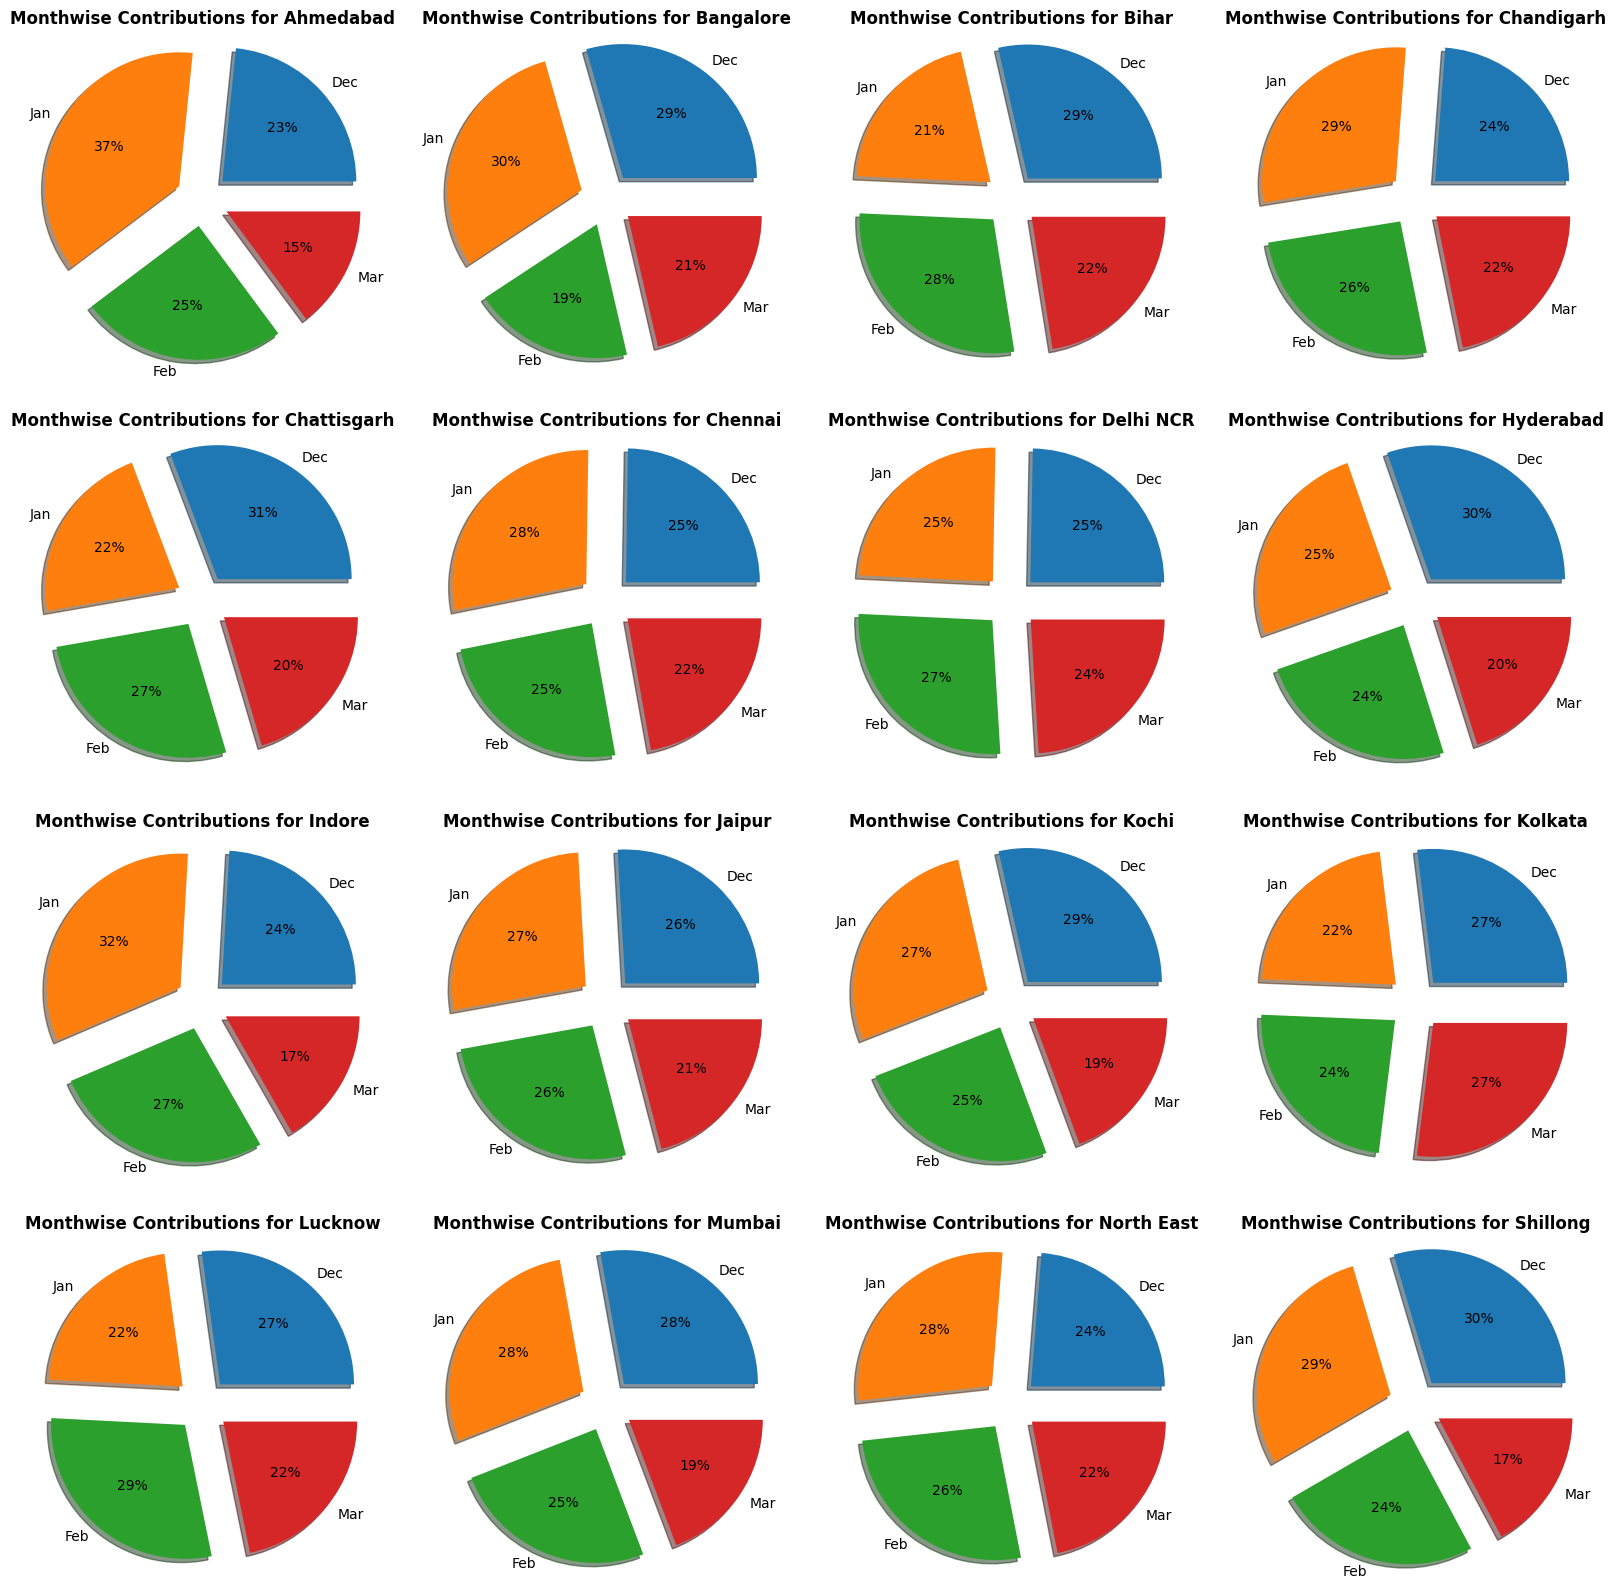

In [19]:
# Stock-taking broad month-wise contributions to cumulative sales

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Arranging multiple plots in a grid lay-out

a = [0]*4 + [1]*4 + [2]*4 + [3]*4
b = [0, 1, 2, 3]*4

for i, idx in enumerate(list(zip(a, b))):
    
    row = df.iloc[i, :]
    
    ax[idx[0], idx[1]].pie(row, labels=[mon[:3] for mon in row.index], explode=0.2*np.ones(4), 
                           autopct='%1.0f%%', shadow=True, textprops={'fontsize': 10})
    ax[idx[0], idx[1]].set_title('Monthwise Contributions for ' + df.index[i], fontweight='bold')

Again, month-wise contributions appear quite comparable. Next, we go for a closer comparison using bar charts.

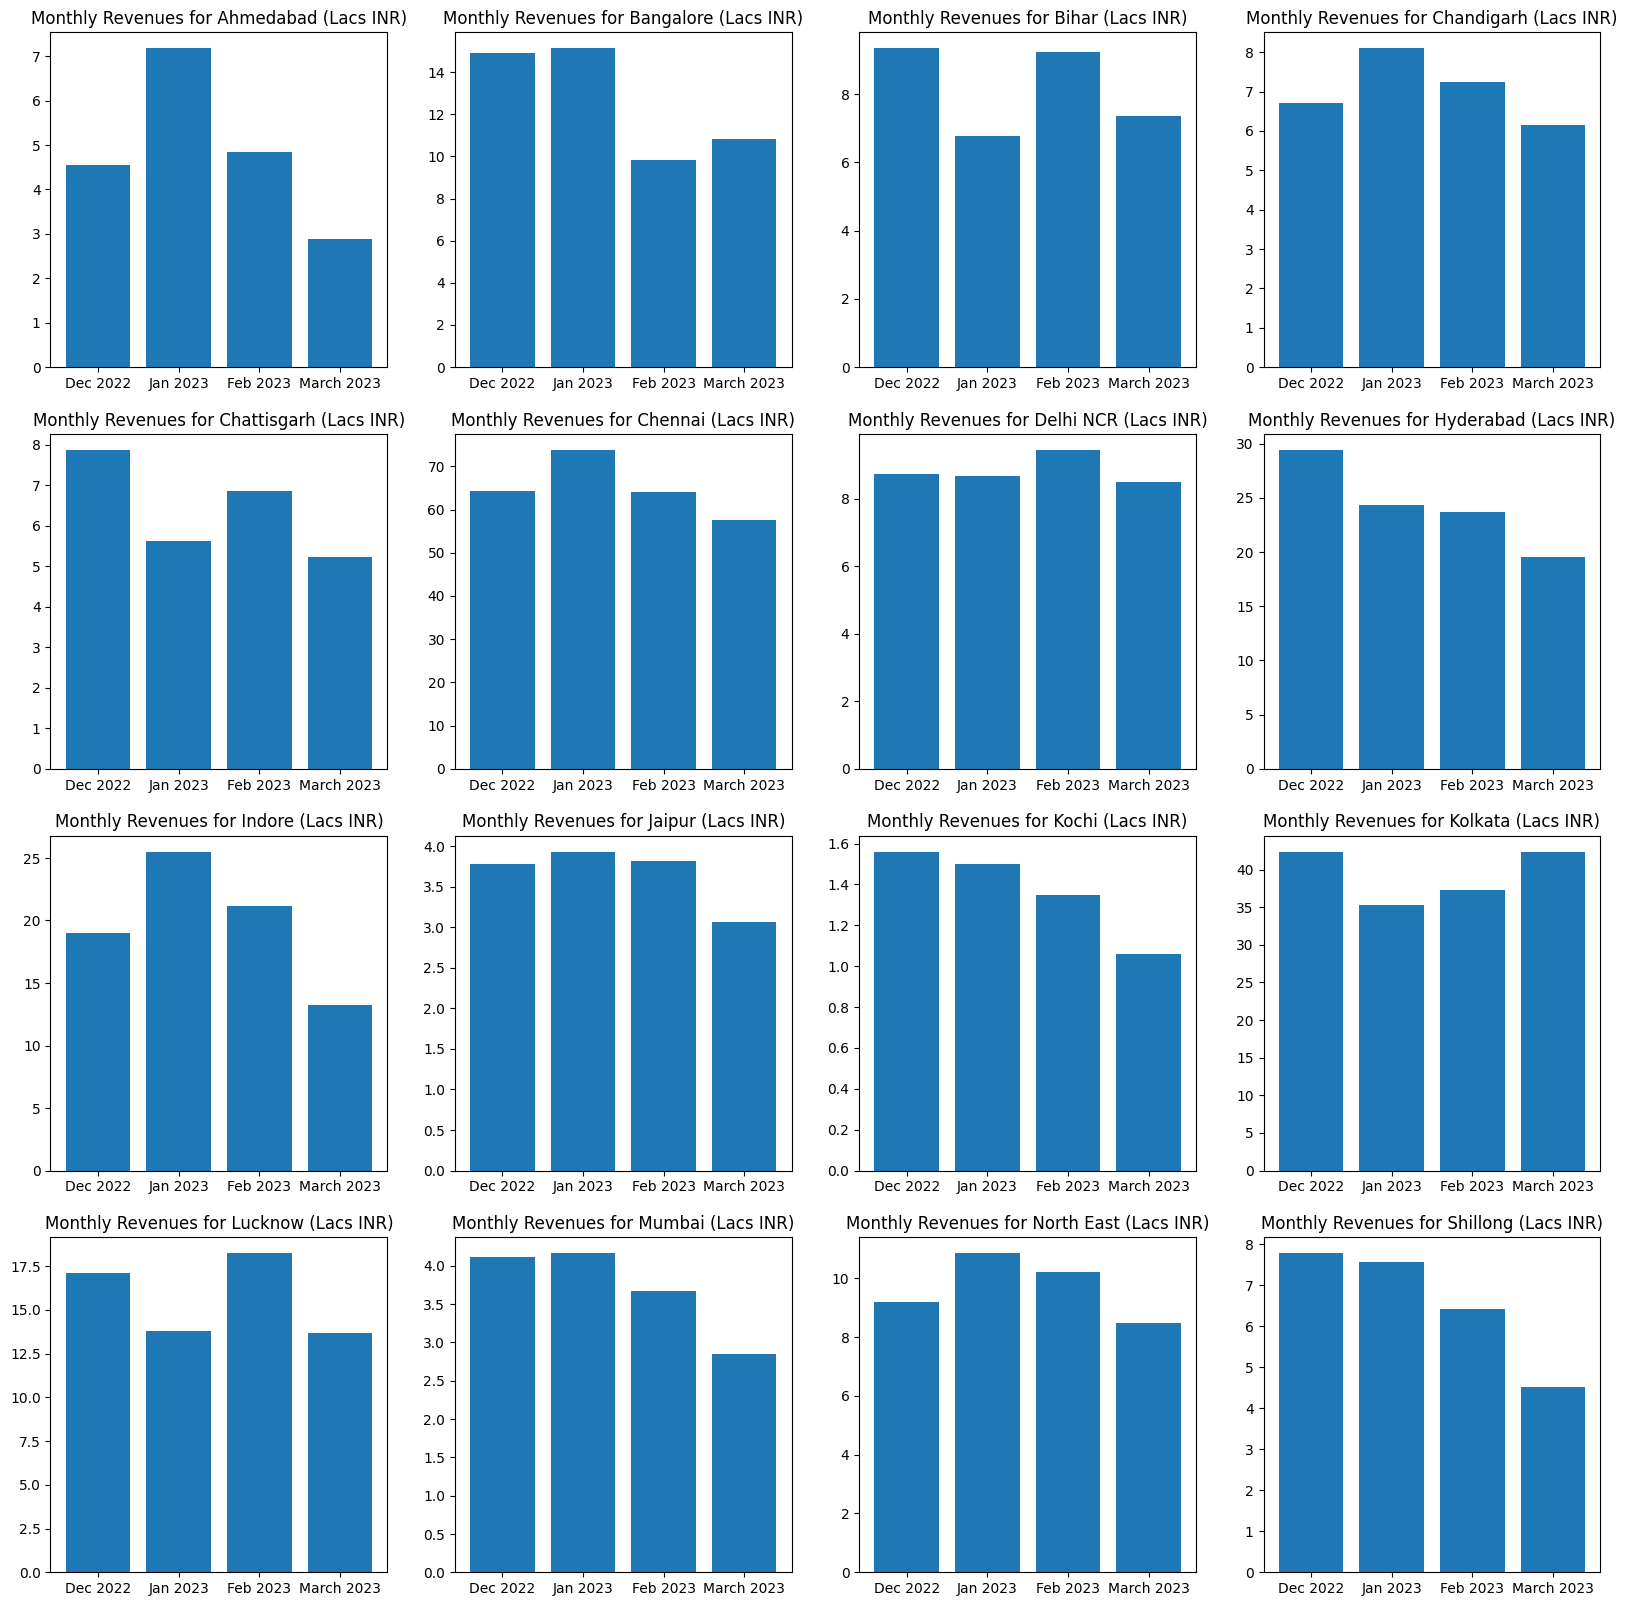

In [20]:
# Comparing monthly revenues for each location

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Arranging multiple plots in a grid lay-out

a = [0]*4 + [1]*4 + [2]*4 + [3]*4
b = [0, 1, 2, 3]*4

for i, idx in enumerate(list(zip(a, b))):
    
    row = df.iloc[i, :]
    
    ax[idx[0], idx[1]].bar(height=row.values, x=row.index)
    ax[idx[0], idx[1]].set_title('Monthly Revenues for ' + df.index[i] + ' (Lacs INR)')

Some locations show monotonous revenue decrease, e.g. Hyderabad, Kochi, Shillong.   
But, this may not be significant, as in general, revenues see an overall dip in February and March.  
Anycase, four data points are too few to draw a reliable conclusion.  


Next, we inspect monthwise revenue changes closely for each location at **its own relative scale**.

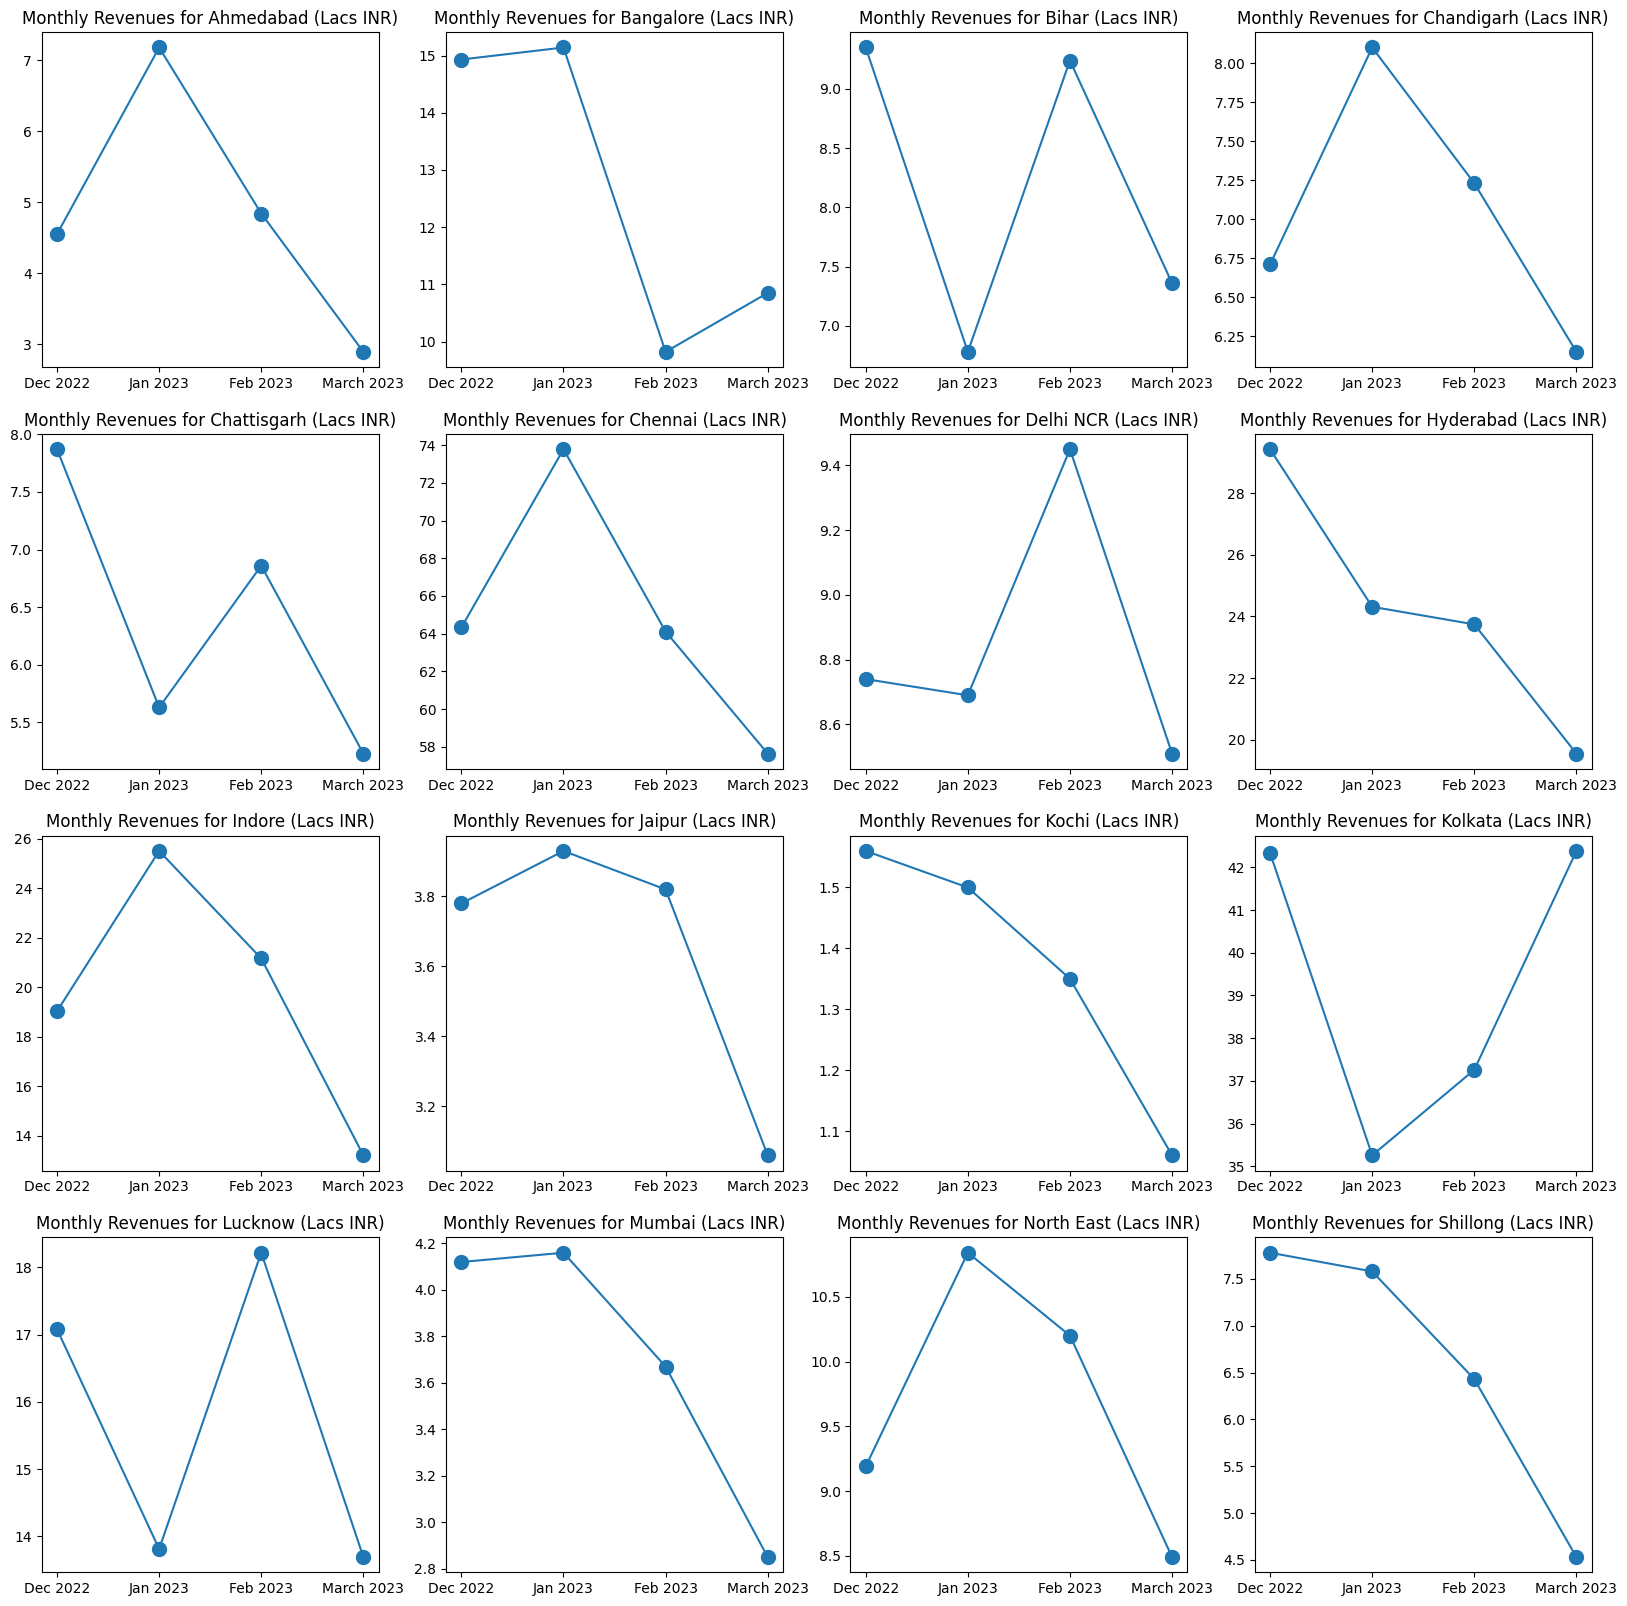

In [21]:
# Inspecting monthly variations closely

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Arranging multiple plots in a grid lay-out

a = [0]*4 + [1]*4 + [2]*4 + [3]*4
b = [0, 1, 2, 3]*4

for i, idx in enumerate(list(zip(a, b))):
    
    row = df.iloc[i, :]
    
    ax[idx[0], idx[1]].plot(row, marker='o', markersize=10)
    ax[idx[0], idx[1]].set_title('Monthly Revenues for ' + df.index[i] + ' (Lacs INR)')

These change profiles could be analysed closely. But, month-wise fractional changes, as numbers, may give a clearer sense.

Next, we explore the revenue variations for each locations and distribution of months around each quartile.

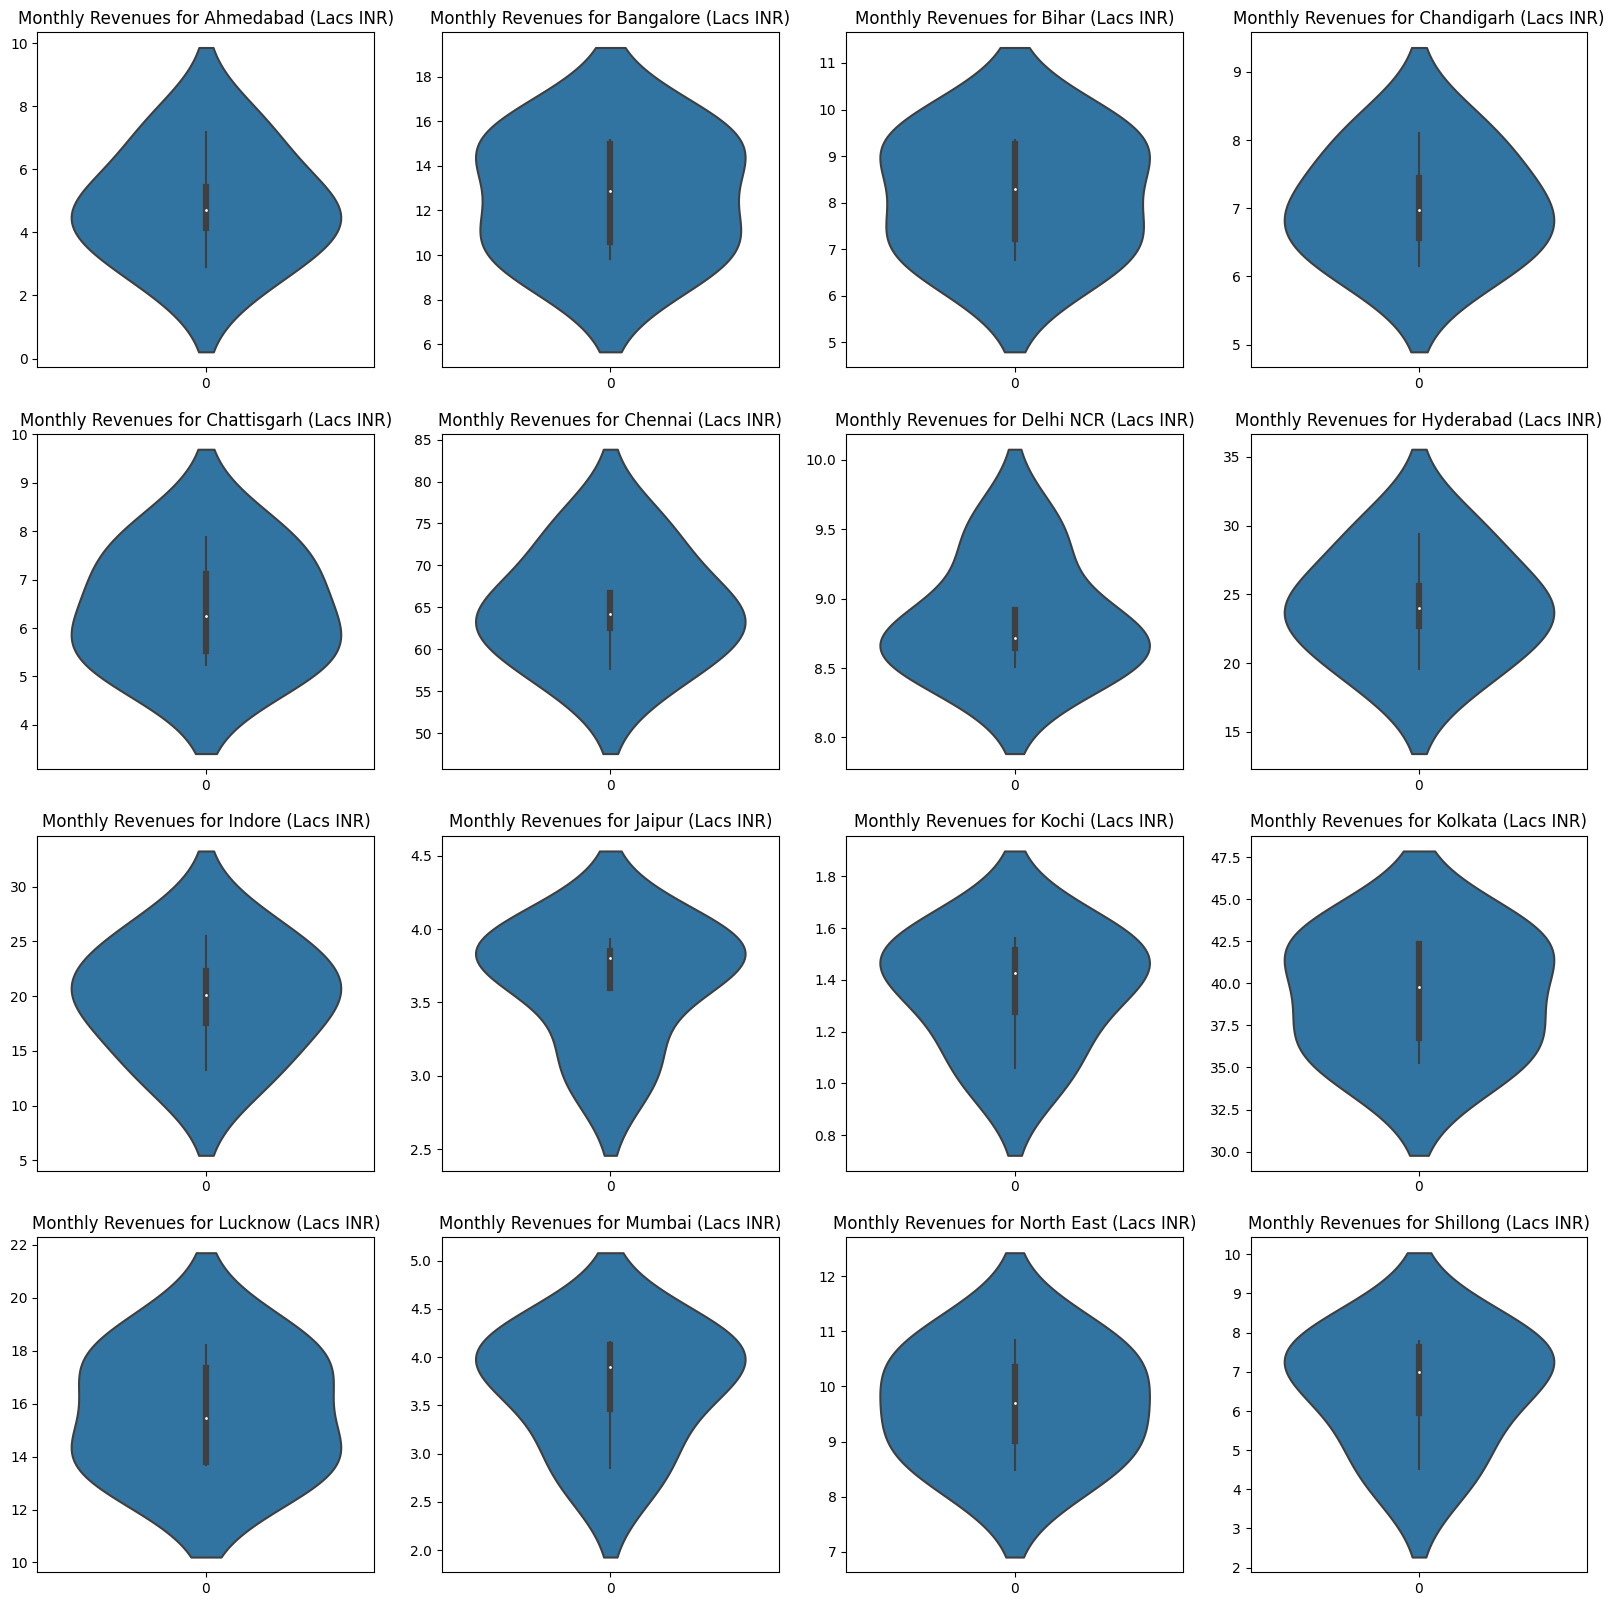

In [22]:
# Inspecting monthly variations closely

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Arranging multiple plots in a grid lay-out

a = [0]*4 + [1]*4 + [2]*4 + [3]*4
b = [0, 1, 2, 3]*4

for i, idx in enumerate(list(zip(a, b))):
    
    row = df.iloc[i, :]
    
    sns.violinplot(row, ax=ax[idx[0], idx[1]])
    ax[idx[0], idx[1]].set_title('Monthly Revenues for ' + df.index[i] + ' (Lacs INR)')

Locations with top bulge indicate more months (~2) with relatively higher revenues, e.g. Indore, Jaipur, Kochi, etc.  
Again, four months are too small to draw any reliable inferences.

Four data points are too few to generate any sort of revenue forecasts. Still, we attempt a rough forecast using a linear model.

Before forecasting, we validate the predictions of the fitted linear model below.  
The linear model below simply fits a straight line, minimising the least squared error.

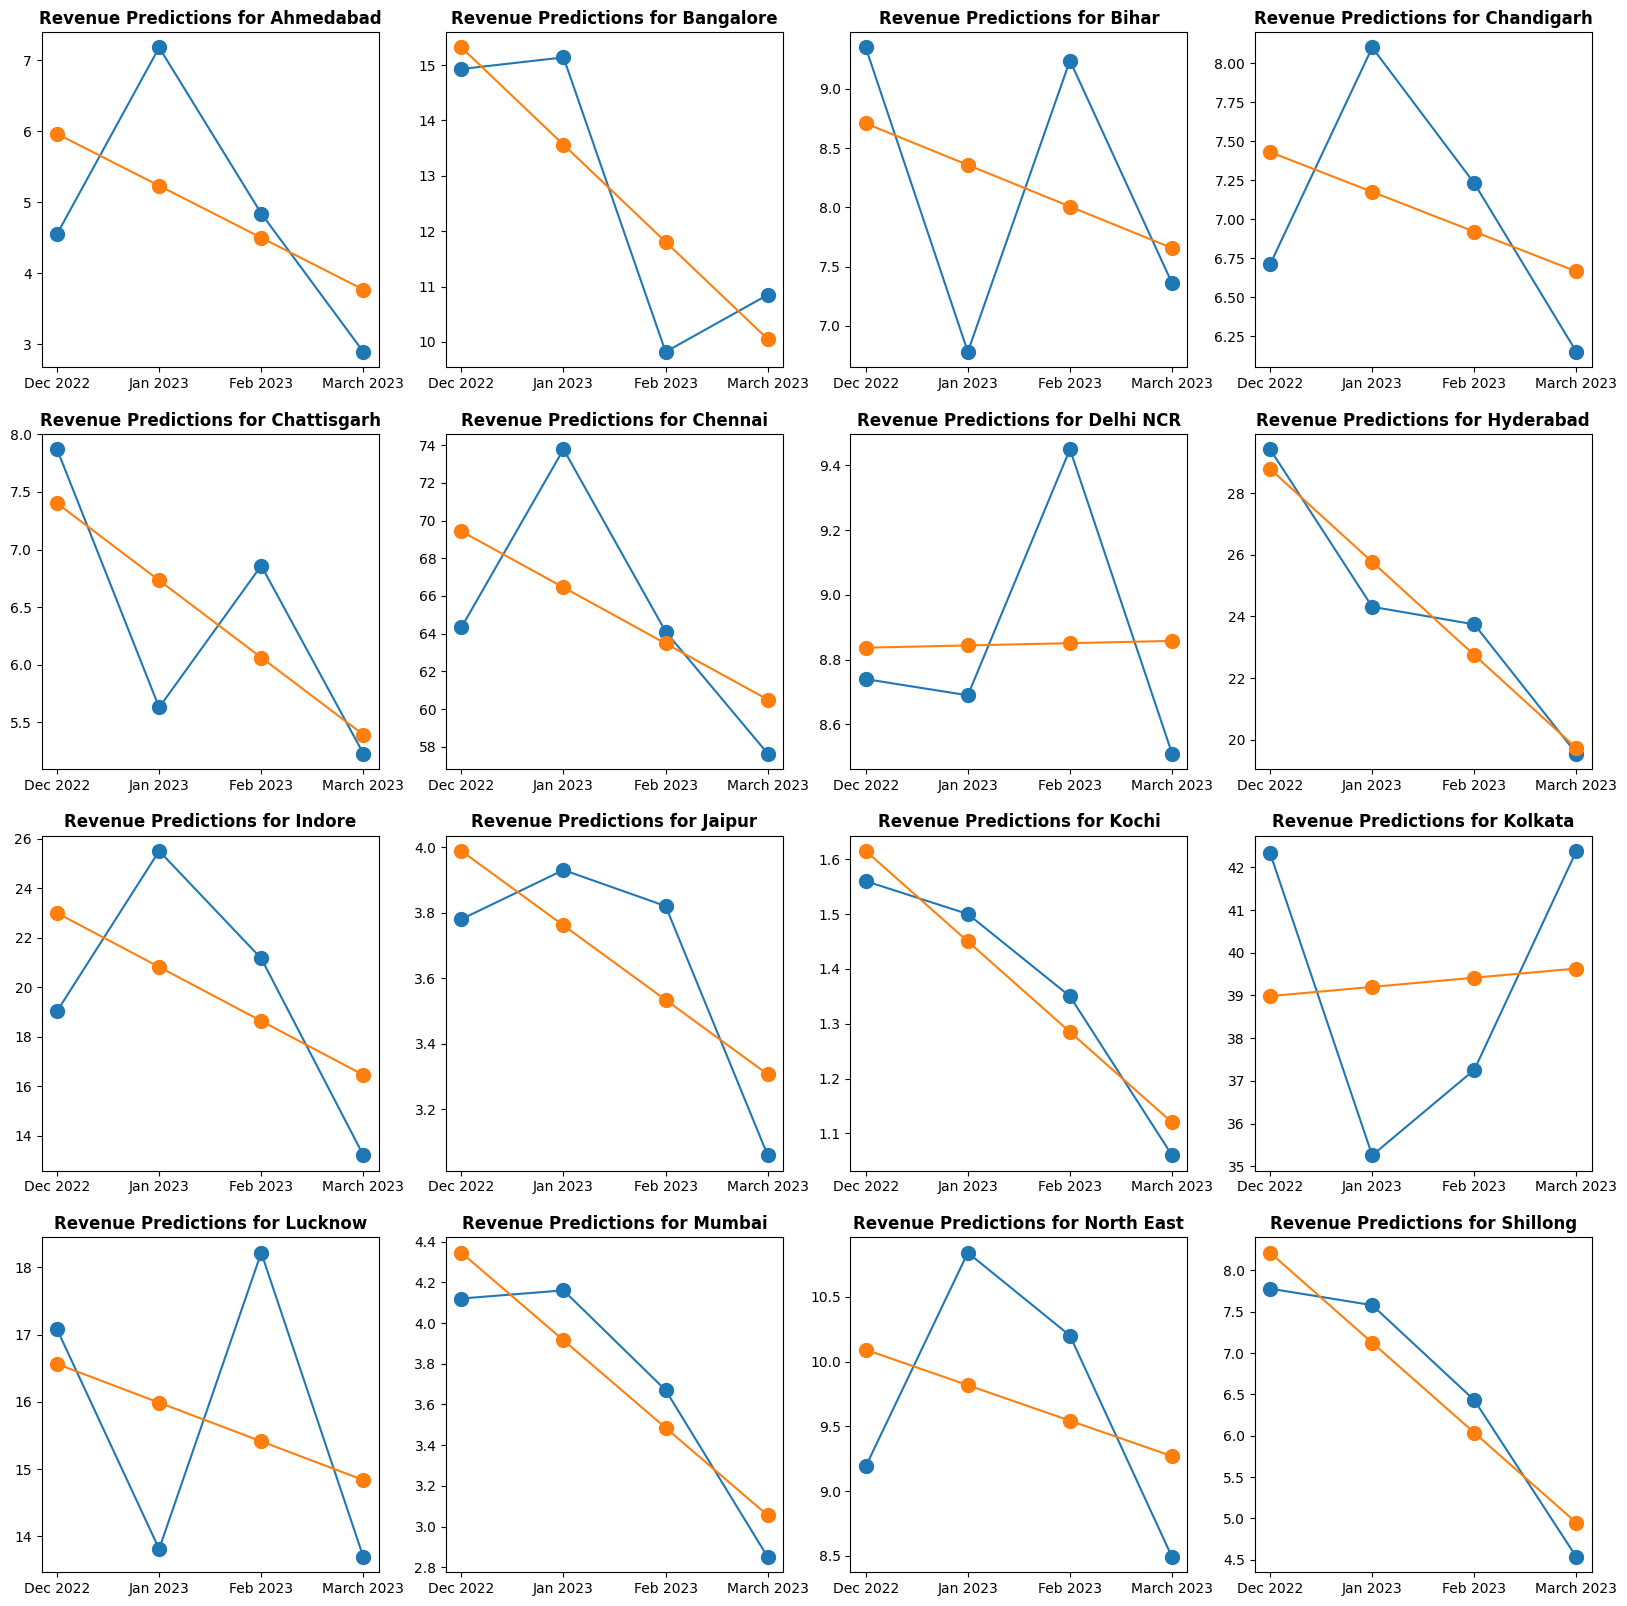

In [23]:
# Fitting a linear model and validating predictions

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Arranging multiple plots in a grid lay-out

a = [0]*4 + [1]*4 + [2]*4 + [3]*4
b = [0, 1, 2, 3]*4

for i, idx in enumerate(list(zip(a, b))):
    
    row = df.iloc[i, :].to_frame()                         # extracting revenue tables for each location
    row['Time'] = np.arange(len(row.index))                # appending a column to show time-steps
    
    X = row.loc[:, ['Time']]                               # setting time step as predictor/feature
    y = row.loc[:, row.columns[0]]                         # setting revenues as prediction target

    model = LinearRegression()                             # instancing and fitting linear model
    model.fit(X, y)

    y_pred = pd.Series(model.predict(X), index=X.index)    # generating and co-plotting predictions
    
    ax[idx[0], idx[1]].plot(y, marker='o', markersize=10)
    ax[idx[0], idx[1]].plot(y_pred, marker='o', markersize=10)
    ax[idx[0], idx[1]].set_title('Revenue Predictions for ' + df.index[i], fontweight='bold')

Predictions, as expected, are not very encouraging, apart from say, Hyderabad, Kochi, Mumbai, and Shillong.    
Even for these locations, we cannot trust the linear model, as we have too few data points to detect a stable trend or seasonality.

Anycase, for curiosity's sake, we generate the base forecasts for next month, April 2023, hoping these may perform slightly better than simple mean extrapolation.

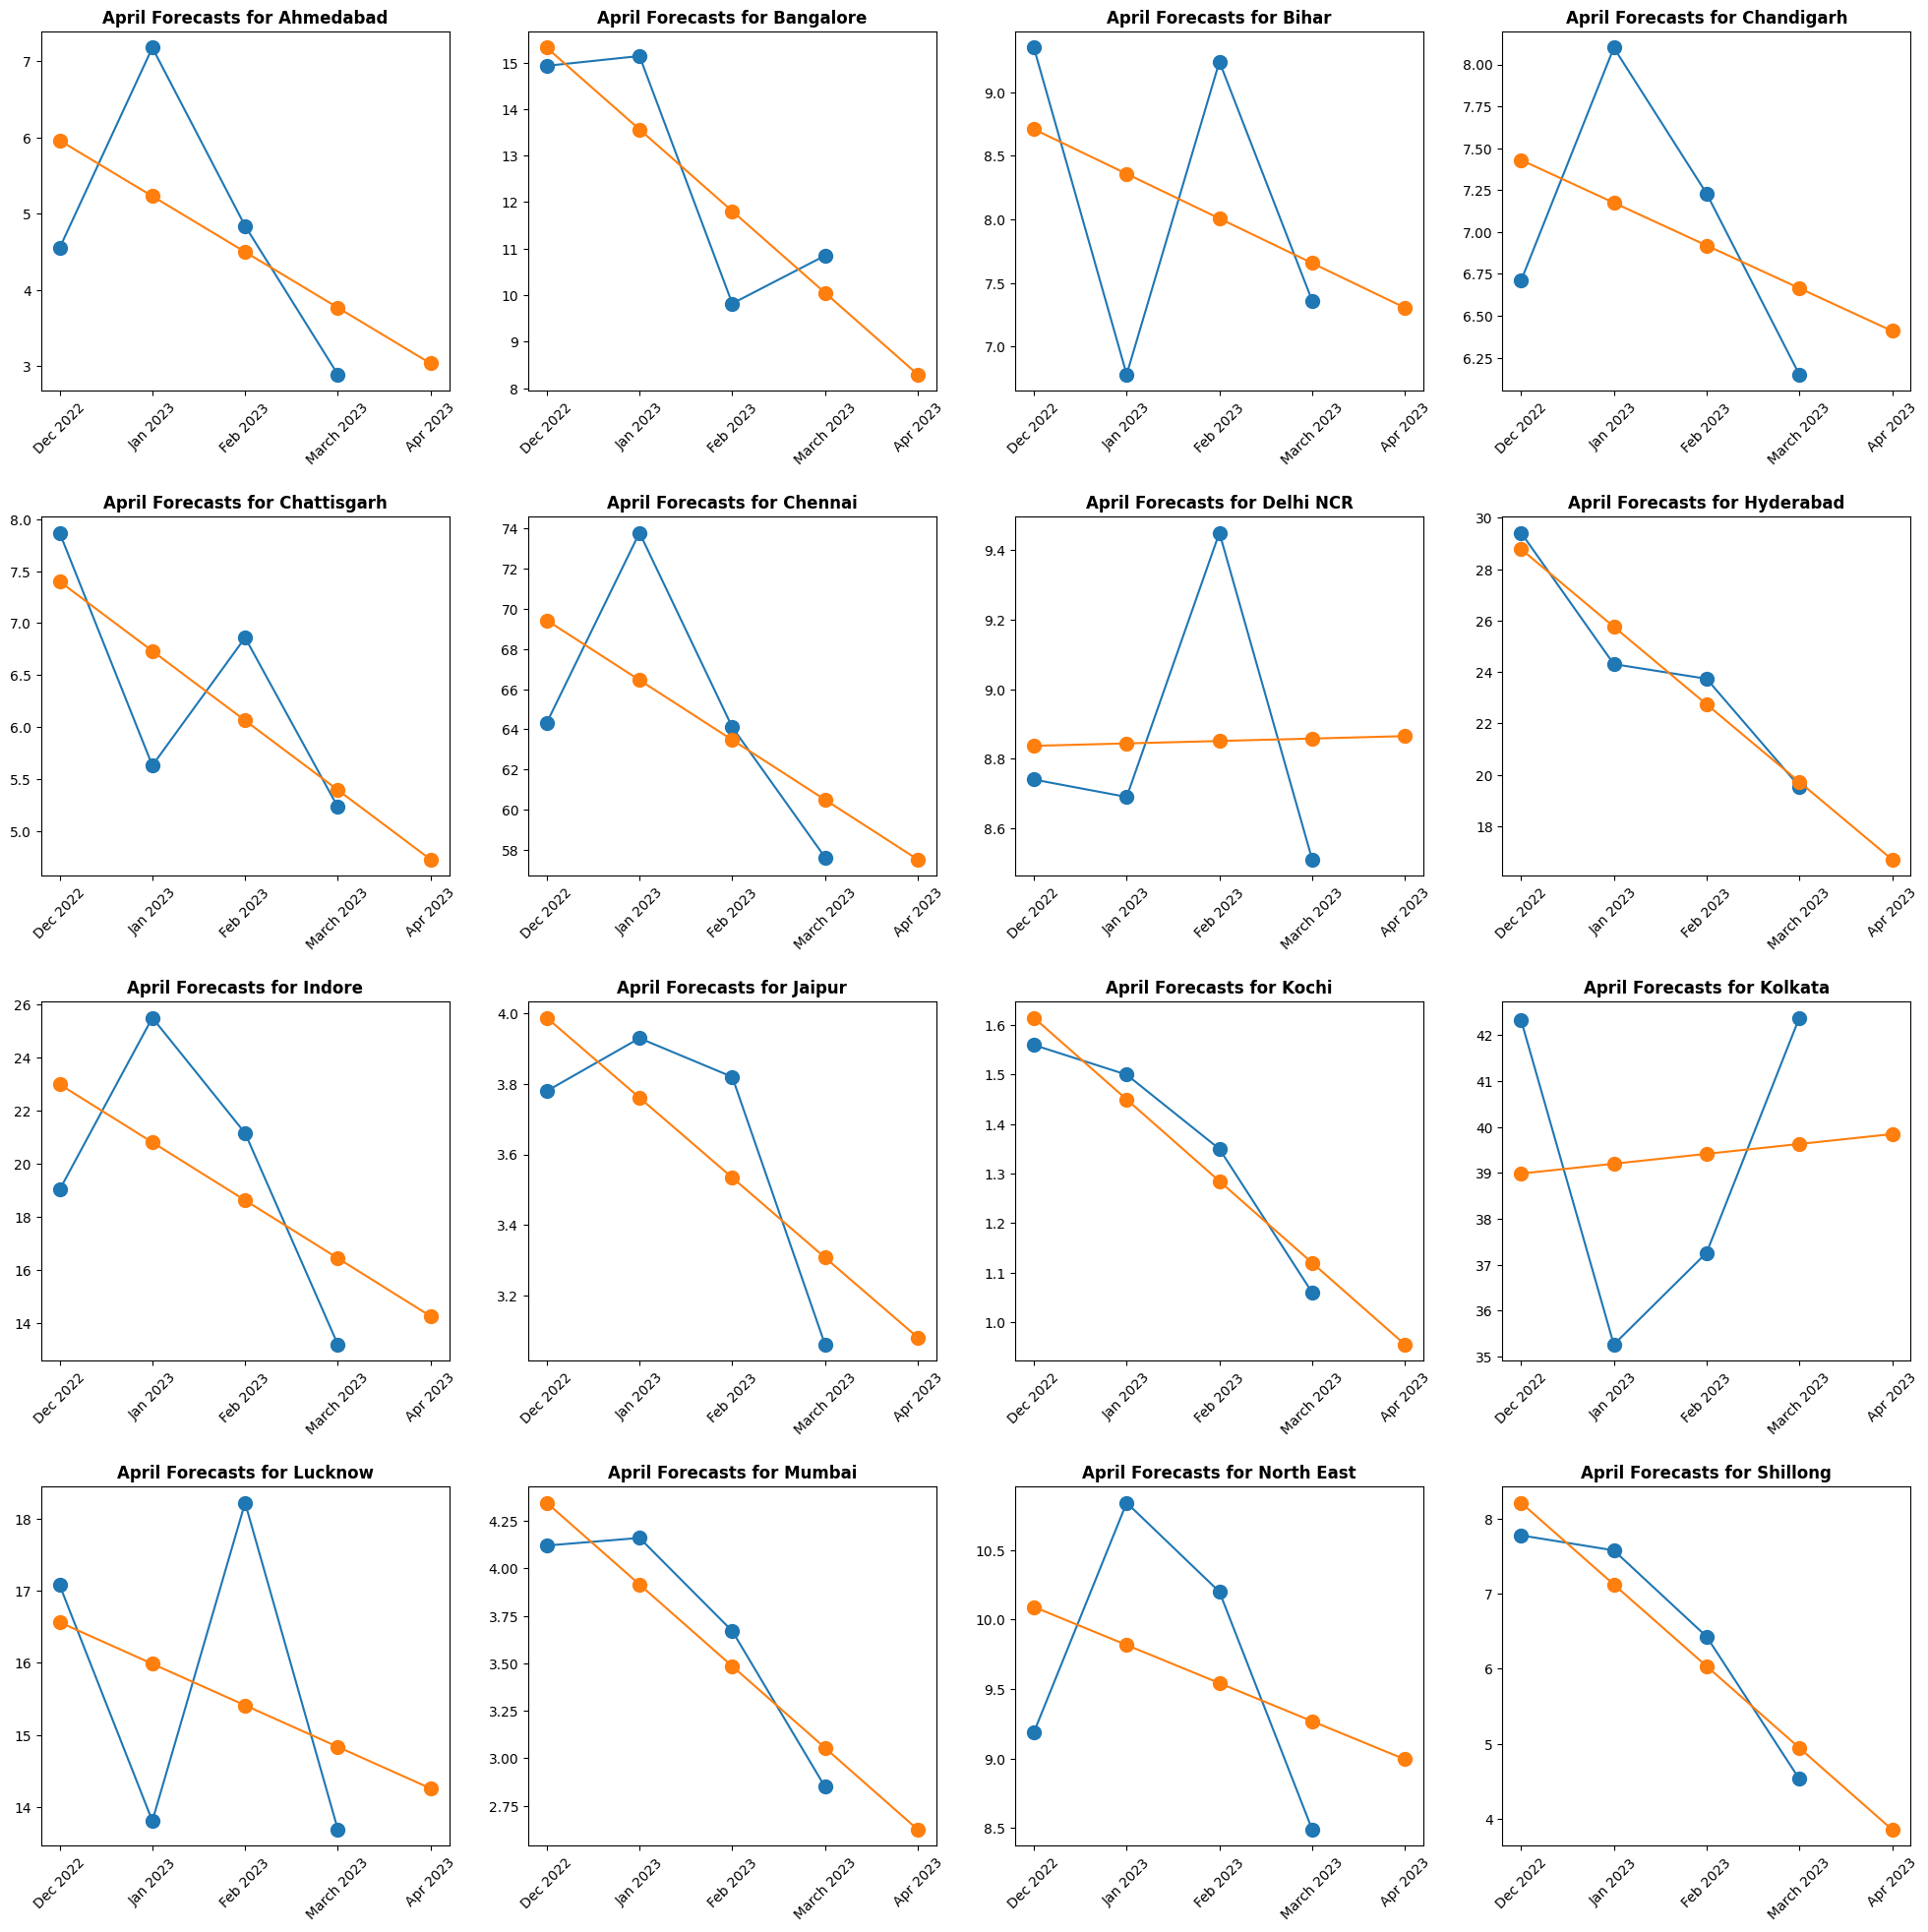

In [24]:
# Generating location-wise revenue forecasts for April

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

a = [0]*4 + [1]*4 + [2]*4 + [3]*4
b = [0, 1, 2, 3]*4

for i, idx in enumerate(list(zip(a, b))):
    
    row = df.iloc[i, :].to_frame()
    row['Time'] = np.arange(len(row.index))
    
    X = row.loc[:, ['Time']]  # features
    y = row.loc[:, row.columns[0]]  # target

    model = LinearRegression()
    model.fit(X, y)

    y_pred = pd.Series(model.predict(X), index=X.index)
    y_pred = y_pred.reindex(y_pred.index.values.tolist()+['Apr 2023'])    # Appending forecasts to current data
    y_pred.iloc[4] = model.predict(np.array([4]).reshape(1, -1))[0]
    
    ax[idx[0], idx[1]].plot(y, marker='o', markersize=10)
    ax[idx[0], idx[1]].plot(y_pred, marker='o', markersize=10)
    ax[idx[0], idx[1]].set_title('April Forecasts for ' + df.index[i], fontweight='bold')
    ax[idx[0], idx[1]].set_xticklabels(labels = y_pred.index, rotation = 45)

fig.tight_layout(pad=2.0)

**End of preliminary exploration**